In [1]:
# Import dependencies
import pandas as pd
import numpy as np
pd.set_option('max_colwidth', 400)

Extract the crowdfunding.xlsx Data

In [2]:
# Read the data into a Pandas DataFrame
crowdfunding_info_df = pd.read_excel('Resources/crowdfunding.xlsx')
crowdfunding_info_df.head()

,cf_id,contact_id,company_name,blurb,goal,pledged,outcome,backers_count,country,currency,launched_at,deadline,staff_pick,spotlight,category & sub-category
0,147,4661,"Baldwin, Riley and Jackson",Pre-emptive tertiary standardization,100,0,failed,0,CA,CAD,1581573600,1614578400,False,False,food/food trucks
1,1621,3765,Odom Inc,Managed bottom-line architecture,1400,14560,successful,158,US,USD,1611554400,1621918800,False,True,music/rock
2,1812,4187,"Melton, Robinson and Fritz",Function-based leadingedge pricing structure,108400,142523,successful,1425,AU,AUD,1608184800,1640844000,False,False,technology/web
3,2156,4941,"Mcdonald, Gonzalez and Ross",Vision-oriented fresh-thinking conglomeration,4200,2477,failed,24,US,USD,1634792400,1642399200,False,False,music/rock
4,1365,2199,Larson-Little,Proactive foreground core,7600,5265,failed,53,US,USD,1608530400,1629694800,False,False,theater/plays


In [3]:
# Get a brief summary of the crowdfunding_info DataFrame.
crowdfunding_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   cf_id                    1000 non-null   int64 
 1   contact_id               1000 non-null   int64 
 2   company_name             1000 non-null   object
 3   blurb                    1000 non-null   object
 4   goal                     1000 non-null   int64 
 5   pledged                  1000 non-null   int64 
 6   outcome                  1000 non-null   object
 7   backers_count            1000 non-null   int64 
 8   country                  1000 non-null   object
 9   currency                 1000 non-null   object
 10  launched_at              1000 non-null   int64 
 11  deadline                 1000 non-null   int64 
 12  staff_pick               1000 non-null   bool  
 13  spotlight                1000 non-null   bool  
 14  category & sub-category  1000 non-null   

Create the Category and Subcategory DataFrames

Create a Category DataFrame that has the following columns:

    A "category_id" column that is numbered sequential form 1 to the length of the number of unique categories.
    A "category" column that has only the categories.

Export the DataFrame as a category.csv CSV file.

Create a SubCategory DataFrame that has the following columns:

    A "subcategory_id" column that is numbered sequential form 1 to the length of the number of unique subcategories.
    A "subcategory" column that has only the subcategories.

Export the DataFrame as a subcategory.csv CSV file.

In [4]:
# Get the crowdfunding_info_df columns.
crowdfunding_info_df.columns

Index(['cf_id', 'contact_id', 'company_name', 'blurb', 'goal', 'pledged',
       'outcome', 'backers_count', 'country', 'currency', 'launched_at',
       'deadline', 'staff_pick', 'spotlight', 'category & sub-category'],
      dtype='object')

In [5]:
# Assign the category and subcategory values to category and subcategory columns.
crowdfunding_info_df[['category', 'subcategory']] = crowdfunding_info_df['category & sub-category'].str.split('/', expand=True)
crowdfunding_info_df.head()

,cf_id,contact_id,company_name,blurb,goal,pledged,outcome,backers_count,country,currency,launched_at,deadline,staff_pick,spotlight,category & sub-category,category,subcategory
0,147,4661,"Baldwin, Riley and Jackson",Pre-emptive tertiary standardization,100,0,failed,0,CA,CAD,1581573600,1614578400,False,False,food/food trucks,food,food trucks
1,1621,3765,Odom Inc,Managed bottom-line architecture,1400,14560,successful,158,US,USD,1611554400,1621918800,False,True,music/rock,music,rock
2,1812,4187,"Melton, Robinson and Fritz",Function-based leadingedge pricing structure,108400,142523,successful,1425,AU,AUD,1608184800,1640844000,False,False,technology/web,technology,web
3,2156,4941,"Mcdonald, Gonzalez and Ross",Vision-oriented fresh-thinking conglomeration,4200,2477,failed,24,US,USD,1634792400,1642399200,False,False,music/rock,music,rock
4,1365,2199,Larson-Little,Proactive foreground core,7600,5265,failed,53,US,USD,1608530400,1629694800,False,False,theater/plays,theater,plays


In [6]:
# Get the unique categories and subcategories in separate lists.
categories = crowdfunding_info_df['category'].unique().tolist()
subcategories =crowdfunding_info_df['subcategory'].unique().tolist()

print(categories)
print(subcategories)

['food', 'music', 'technology', 'theater', 'film & video', 'publishing', 'games', 'photography', 'journalism']
['food trucks', 'rock', 'web', 'plays', 'documentary', 'electric music', 'drama', 'indie rock', 'wearables', 'nonfiction', 'animation', 'video games', 'shorts', 'fiction', 'photography books', 'radio & podcasts', 'metal', 'jazz', 'translations', 'television', 'mobile games', 'world music', 'science fiction', 'audio']


In [7]:
# Get the number of distinct values in the categories and subcategories lists.
print(len(categories))
print(len(subcategories))

9
24


In [8]:
# Create numpy arrays from 1-9 for the categories and 1-24 for the subcategories.
category_ids = np.arange(1, 10)
subcategory_ids = np.arange(1, 25)

print(category_ids)
print(subcategory_ids)

[1 2 3 4 5 6 7 8 9]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]


In [9]:
# Create a copy of the crowdfunding_info_df DataFrame name campaign_df. 
campaign_df = crowdfunding_info_df.copy()
campaign_df.head()

,cf_id,contact_id,company_name,blurb,goal,pledged,outcome,backers_count,country,currency,launched_at,deadline,staff_pick,spotlight,category & sub-category,category,subcategory
0,147,4661,"Baldwin, Riley and Jackson",Pre-emptive tertiary standardization,100,0,failed,0,CA,CAD,1581573600,1614578400,False,False,food/food trucks,food,food trucks
1,1621,3765,Odom Inc,Managed bottom-line architecture,1400,14560,successful,158,US,USD,1611554400,1621918800,False,True,music/rock,music,rock
2,1812,4187,"Melton, Robinson and Fritz",Function-based leadingedge pricing structure,108400,142523,successful,1425,AU,AUD,1608184800,1640844000,False,False,technology/web,technology,web
3,2156,4941,"Mcdonald, Gonzalez and Ross",Vision-oriented fresh-thinking conglomeration,4200,2477,failed,24,US,USD,1634792400,1642399200,False,False,music/rock,music,rock
4,1365,2199,Larson-Little,Proactive foreground core,7600,5265,failed,53,US,USD,1608530400,1629694800,False,False,theater/plays,theater,plays


In [10]:
# Rename the blurb, launched_at, and deadline columns.
campaign_df = campaign_df.rename(columns={'blurb': 'description', 'launched_at': 'launch_date', 'deadline': 'end_date'})
campaign_df.head()

,cf_id,contact_id,company_name,description,goal,pledged,outcome,backers_count,country,currency,launch_date,end_date,staff_pick,spotlight,category & sub-category,category,subcategory
0,147,4661,"Baldwin, Riley and Jackson",Pre-emptive tertiary standardization,100,0,failed,0,CA,CAD,1581573600,1614578400,False,False,food/food trucks,food,food trucks
1,1621,3765,Odom Inc,Managed bottom-line architecture,1400,14560,successful,158,US,USD,1611554400,1621918800,False,True,music/rock,music,rock
2,1812,4187,"Melton, Robinson and Fritz",Function-based leadingedge pricing structure,108400,142523,successful,1425,AU,AUD,1608184800,1640844000,False,False,technology/web,technology,web
3,2156,4941,"Mcdonald, Gonzalez and Ross",Vision-oriented fresh-thinking conglomeration,4200,2477,failed,24,US,USD,1634792400,1642399200,False,False,music/rock,music,rock
4,1365,2199,Larson-Little,Proactive foreground core,7600,5265,failed,53,US,USD,1608530400,1629694800,False,False,theater/plays,theater,plays


In [11]:
# Read the data into a Pandas DataFrame. Use the `header=2` parameter when reading in the data.
contact_info_df = pd.read_excel('Resources/contacts.xlsx', header=2)
contact_info_df.head()

,
0,contact_info
1,"{""contact_id"": 4661, ""name"": ""Cecilia Velasco"", ""email"": ""cecilia.velasco@rodrigues.fr""}"
2,"{""contact_id"": 3765, ""name"": ""Mariana Ellis"", ""email"": ""mariana.ellis@rossi.org""}"
3,"{""contact_id"": 4187, ""name"": ""Sofie Woods"", ""email"": ""sofie.woods@riviere.com""}"
4,"{""contact_id"": 4941, ""name"": ""Jeanette Iannotti"", ""email"": ""jeanette.iannotti@yahoo.com""}"


In [12]:
# Iterate through the contact_info_df and convert each row to a dictionary.
import json

dict_values = []
for i, row in contact_info_df.iterrows():
    # Assuming the first column contains the JSON string
    data = row[0]
    try:
        converted_data = json.loads(data)
        # Extract keys and values
        columns = [key for key in converted_data.keys()]
        row_values = [value for value in converted_data.values()]
        dict_values.append(row_values)
    except json.JSONDecodeError:
        print(f"Error decoding JSON for row {i}: {data}")

# Print out the list of values for each row.
print(dict_values)

Error decoding JSON for row 0: contact_info
[[4661, 'Cecilia Velasco', 'cecilia.velasco@rodrigues.fr'], [3765, 'Mariana Ellis', 'mariana.ellis@rossi.org'], [4187, 'Sofie Woods', 'sofie.woods@riviere.com'], [4941, 'Jeanette Iannotti', 'jeanette.iannotti@yahoo.com'], [2199, 'Samuel Sorgatz', 'samuel.sorgatz@gmail.com'], [5650, 'Socorro Luna', 'socorro.luna@hotmail.com'], [5889, 'Carolina Murray', 'carolina.murray@knight.com'], [4842, 'Kayla Moon', 'kayla.moon@yahoo.de'], [3280, 'Ariadna Geisel', 'ariadna.geisel@rangel.com'], [5468, 'Danielle Ladeck', 'danielle.ladeck@scalfaro.net'], [3064, 'Tatiana Thompson', 'tatiana.thompson@hunt.net'], [4904, 'Caleb Benavides', 'caleb.benavides@rubio.com'], [1299, 'Sandra Hardy', 'sandra.hardy@web.de'], [5602, 'Lotti Morris', 'lotti.morris@yahoo.co.uk'], [5753, 'Reinhilde White', 'reinhilde.white@voila.fr'], [4495, 'Kerry Patel', 'kerry.patel@hutchinson.com'], [4269, 'Sophie Antoine', 'sophie.antoine@andersen.com'], [2226, 'Martha Girard', 'martha.gir

C:\Users\Meena Vellala\AppData\Local\Temp\ipykernel_25328\757304271.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data = row[0]


In [13]:
# Create a contact_info DataFrame and add each list of values, i.e., each row 
# to the 'contact_id', 'name', 'email' columns.
contact_information_df = pd.DataFrame(dict_values, columns = ('contact_id', 'name','email'))
contact_information_df.head()

,contact_id,name,email
0,4661,Cecilia Velasco,cecilia.velasco@rodrigues.fr
1,3765,Mariana Ellis,mariana.ellis@rossi.org
2,4187,Sofie Woods,sofie.woods@riviere.com
3,4941,Jeanette Iannotti,jeanette.iannotti@yahoo.com
4,2199,Samuel Sorgatz,samuel.sorgatz@gmail.com


In [14]:
# Create a "first"name" and "last_name" column with the first and last names from the "name" column. 
contact_information_df[['first_name', 'last_name']] = contact_information_df['name'].str.split(" ", n=1,expand=True)
contact_information_df.head()
# Drop the contact_name column
contact_info_clean_df = contact_information_df.drop(['name'],axis=1)
contact_info_clean_df.head(5)

,contact_id,email,first_name,last_name
0,4661,cecilia.velasco@rodrigues.fr,Cecilia,Velasco
1,3765,mariana.ellis@rossi.org,Mariana,Ellis
2,4187,sofie.woods@riviere.com,Sofie,Woods
3,4941,jeanette.iannotti@yahoo.com,Jeanette,Iannotti
4,2199,samuel.sorgatz@gmail.com,Samuel,Sorgatz


Graphs

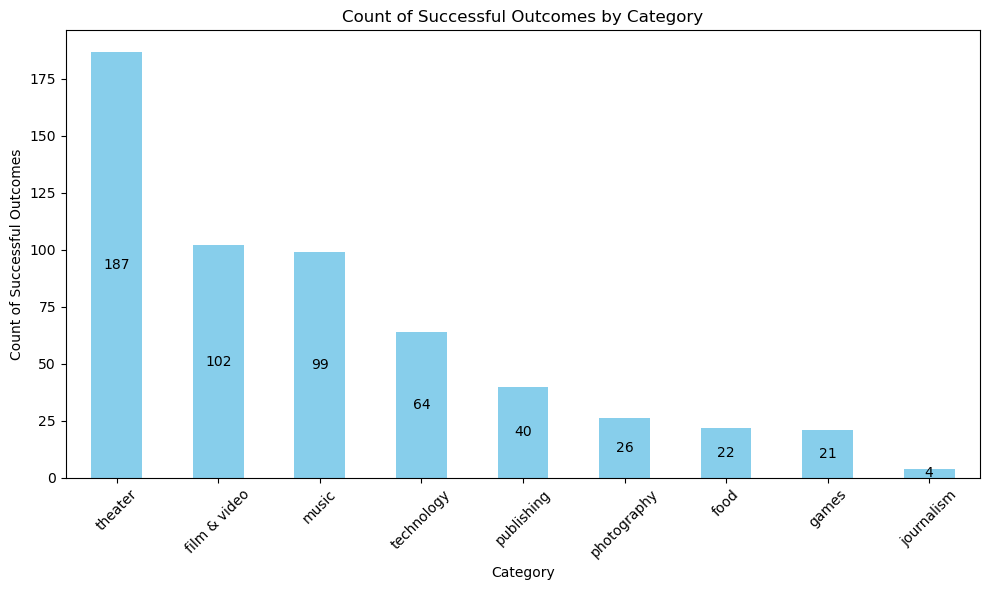

<Figure size 640x480 with 0 Axes>

In [27]:
import matplotlib.pyplot as plt
crowdfunding_info_df

# Filter for successful outcomes
successful_outcomes = crowdfunding_info_df[crowdfunding_info_df['outcome'] == 'successful']
# Count successes per category
success_counts = successful_outcomes['category'].value_counts()

# Create a bar chart and assign it to ax
plt.figure(figsize=(10, 6))
ax = success_counts.plot(kind='bar', color='skyblue')

# Add value labels on top of each section of the bars for values greater than zero
for container in ax.containers:
    ax.bar_label(container, label_type='center', labels=[f"{h:.0f}" if h > 0 else "" for h in container.datavalues])  # Place the label in the center of each section

plt.title('Count of Successful Outcomes by Category')
plt.xlabel('Category')
plt.ylabel('Count of Successful Outcomes')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()
plt.savefig("Resources/Count_of_successful_outcomes_by_category.png")


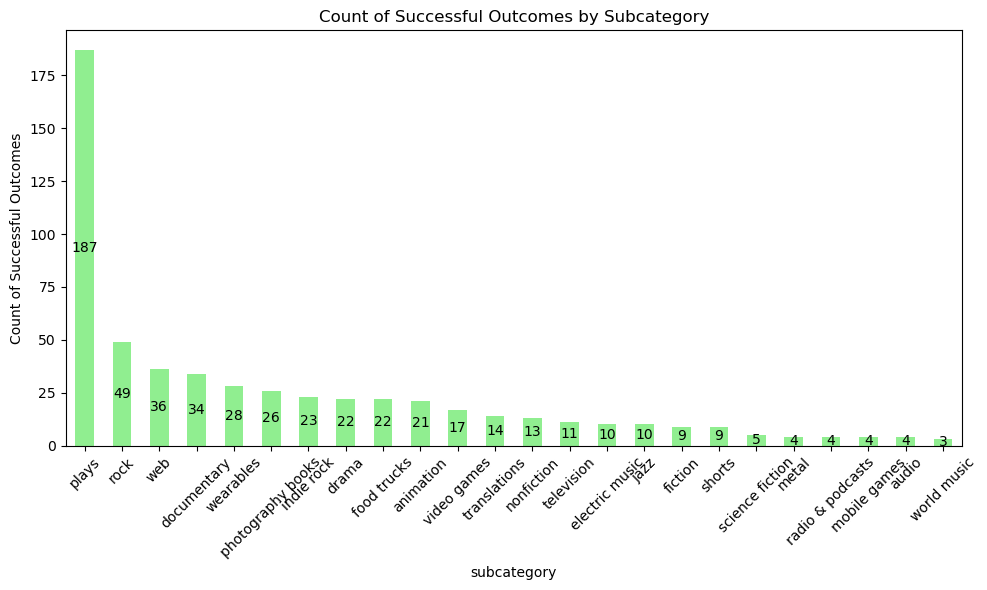

<Figure size 640x480 with 0 Axes>

In [28]:
import matplotlib.pyplot as plt
crowdfunding_info_df

# Filter for successful outcomes
successful_outcomes = crowdfunding_info_df[crowdfunding_info_df['outcome'] == 'successful']
# Count successes per category
success_counts = successful_outcomes['subcategory'].value_counts()

# Create a bar chart and assign it to ax
plt.figure(figsize=(10, 6))
ax = success_counts.plot(kind='bar', color='lightgreen')

# Add value labels on top of each section of the bars for values greater than zero
for container in ax.containers:
    ax.bar_label(container, label_type='center', labels=[f"{h:.0f}" if h > 0 else "" for h in container.datavalues])  # Place the label in the center of each section

plt.title('Count of Successful Outcomes by Subcategory')
plt.xlabel('subcategory')
plt.ylabel('Count of Successful Outcomes')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()
plt.savefig("Resources/Count_of_successful_outcomes_by_subcategory.png")